# Boston Housing Price Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None) #no headers present and the white spaces need to be avoided 

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Attribute Information

| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [4]:
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df.columns = col_name

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Exploartory Data Analysis

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


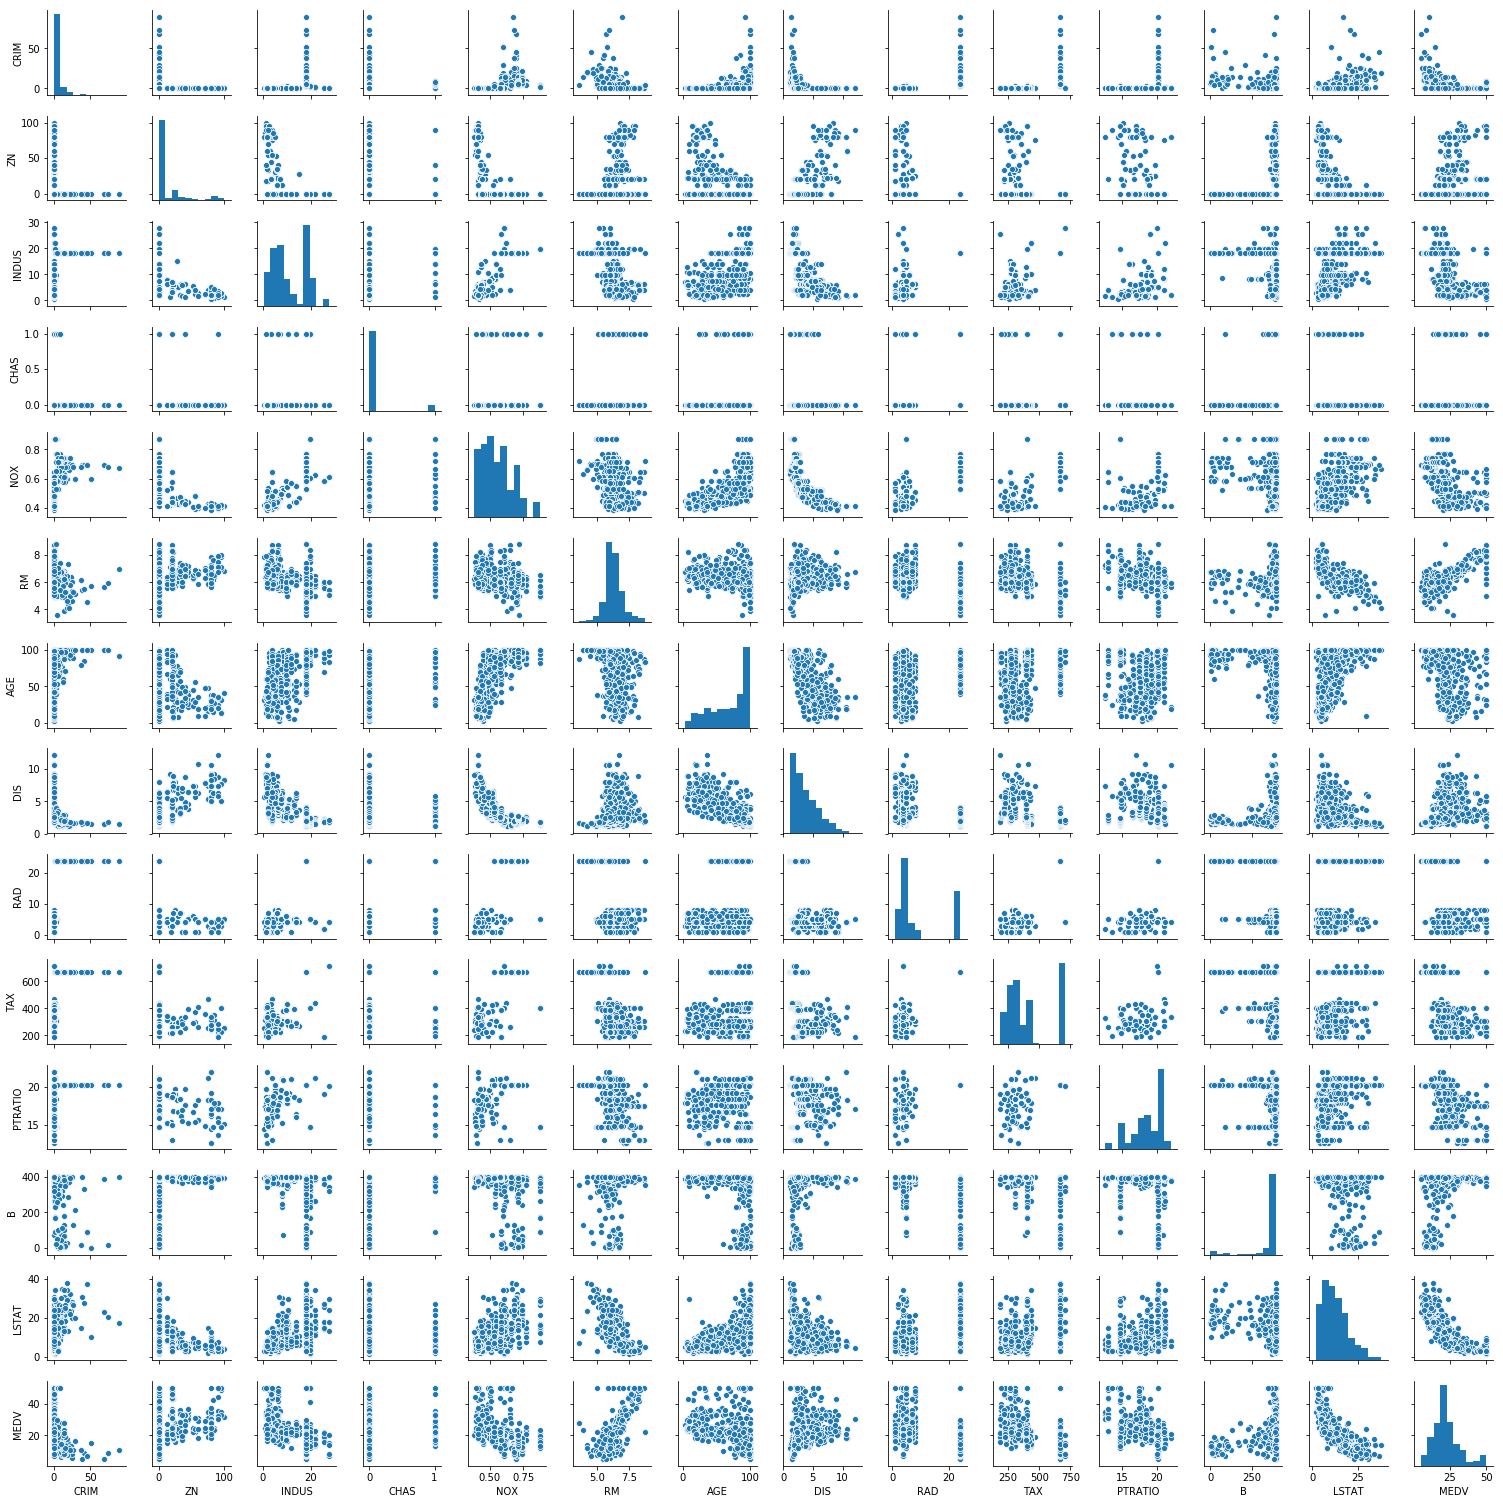

In [9]:
sns.pairplot(df, size=1.5);
plt.show()

In [10]:
col_study = [ 'PTRATIO', 'B', 'MEDV']

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


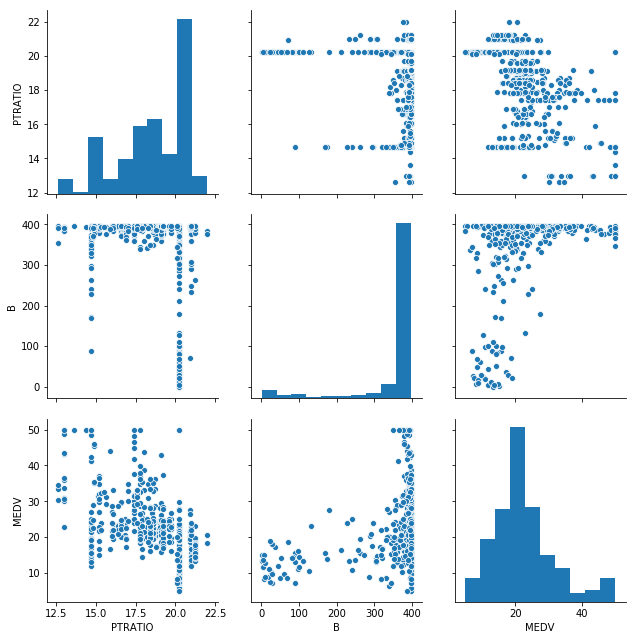

In [11]:
sns.pairplot(df[col_study], size=3);
plt.show()

| Code   | Description   |
|:---|:---|
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's |

## Correlation Analysis and Feature Selection

In [12]:
pd.options.display.float_format='{:,.3f}'.format

In [13]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


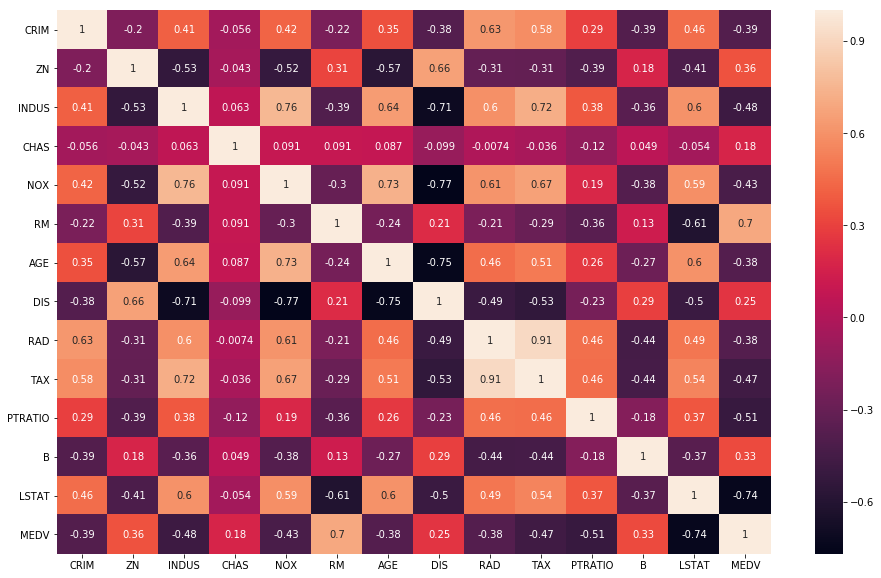

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
col_heat = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']

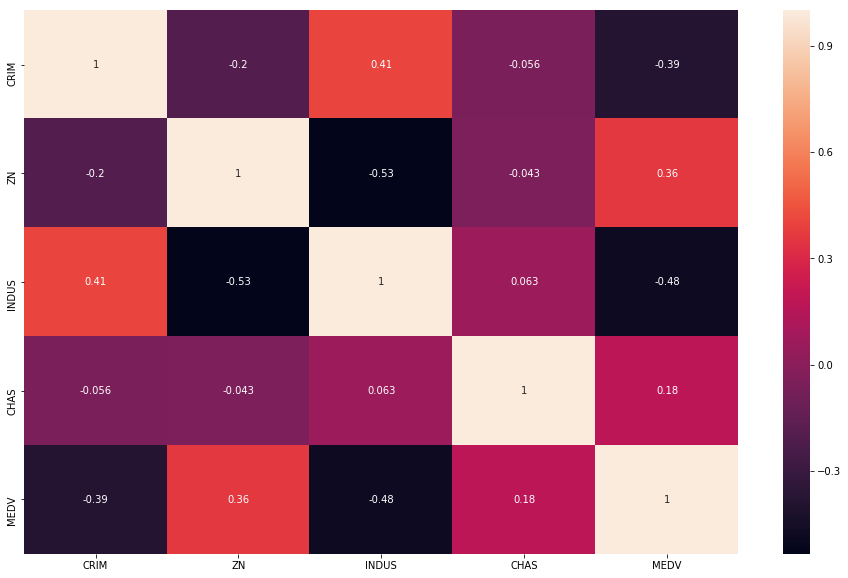

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(df[col_heat].corr(), annot=True)
plt.show()

## Supervised Learning : Univariate Linear Regression with Scikit-learn

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X = df['RM'].values.reshape(-1,1)

In [20]:
y = df['MEDV'].values

In [21]:
model = LinearRegression()

In [22]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
model.coef_ #slope

array([9.10210898])

In [24]:
model.intercept_ #intercept

-34.67062077643857

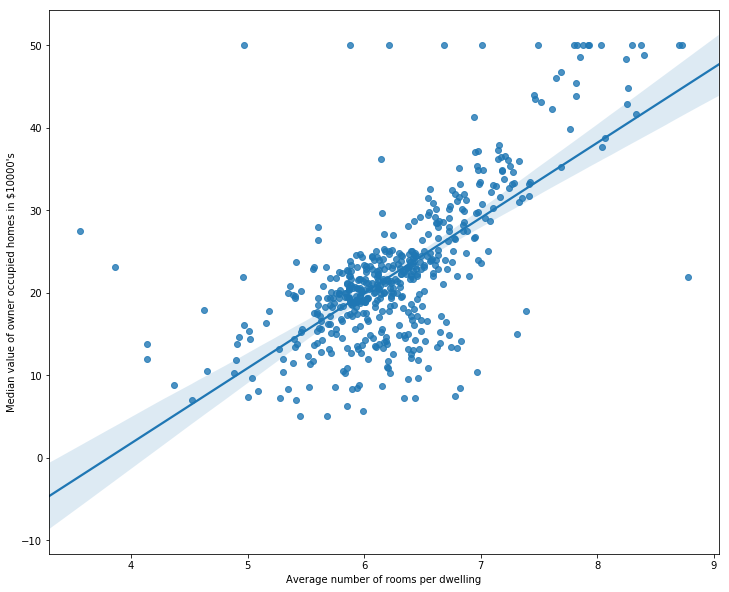

In [25]:
plt.figure(figsize=(12,10))
sns.regplot(X,y);
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner occupied homes in $10000\'s')
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


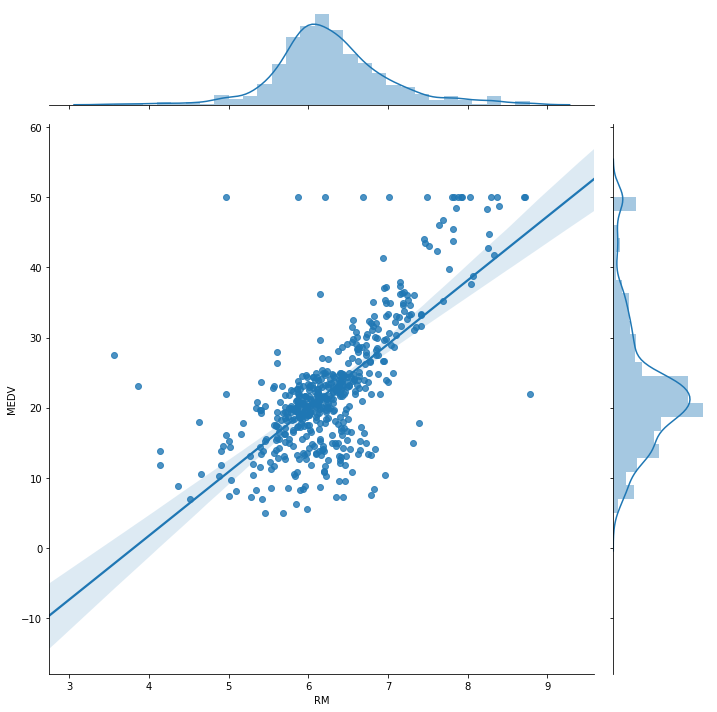

In [26]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', size=10);
plt.show();

In [27]:
X1 = df['LSTAT'].values.reshape(-1,1)

In [28]:
model1 = LinearRegression()

In [29]:
model1.fit(X1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
model1.coef_

array([-0.95004935])

In [31]:
model1.intercept_

34.5538408793831

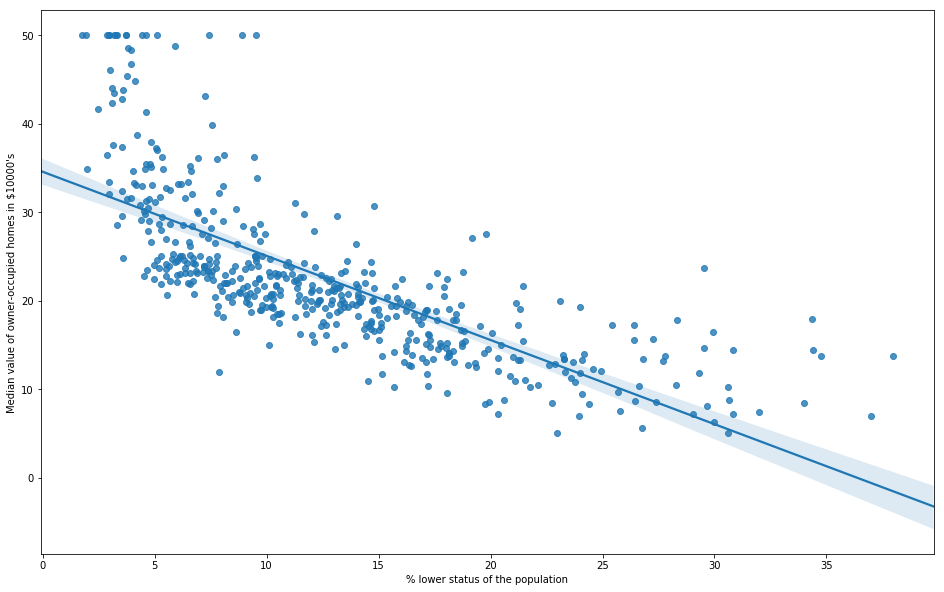

In [32]:
plt.figure(figsize=(16,10))
sns.regplot(X1,y);
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $10000\'s')
plt.show();

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


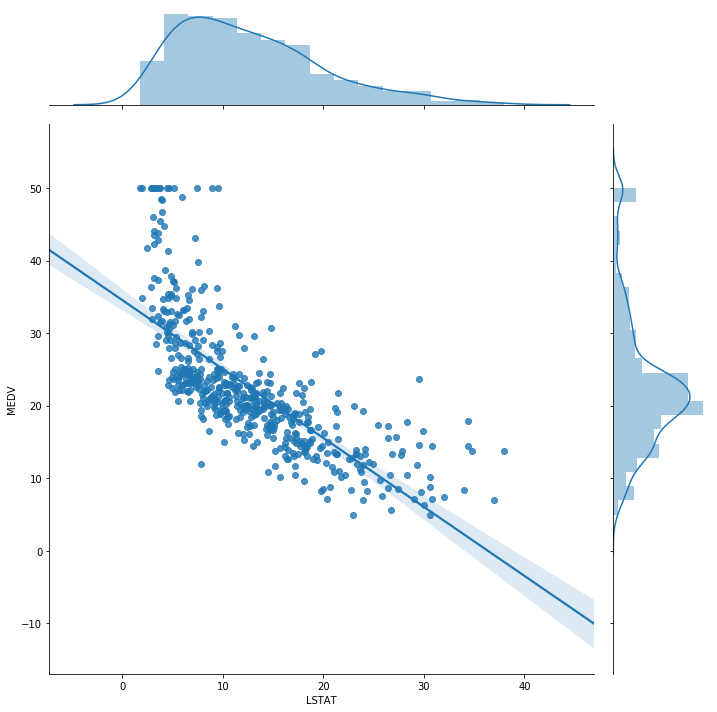

In [33]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, size=10, kind='reg');
plt.show();

## Robust Regression 
### Outliers: http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html

In [34]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


#### RANSAC Algorithm (Random sample Consensus)

Fits a model from random subsets of inliers from the complete data set

In [54]:
X = df['RM'].values.reshape(-1,1)

In [55]:
y = df['MEDV'].values

In [57]:
from sklearn.linear_model import RANSACRegressor

In [58]:
ransac = RANSACRegressor()

In [59]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [61]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [65]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

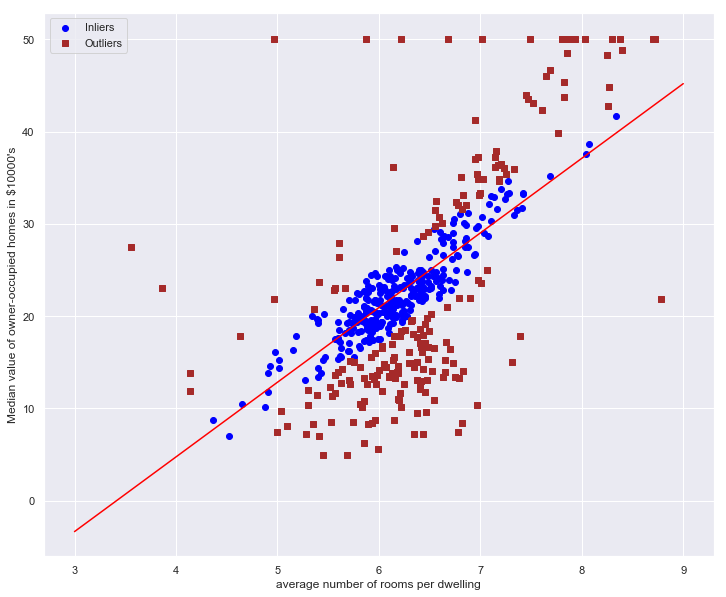

In [67]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $10000\'s')
plt.legend(loc='upper left')
plt.show()

In [69]:
ransac.estimator_.coef_

array([8.09087101])

In [71]:
ransac.estimator_.intercept_

-27.618934538465098

#### Robut Regression: LSTAT vs MEDV

In [160]:
X1 = df['LSTAT'].values.reshape(-1, 1)

In [161]:
y1 = df['MEDV'].values

In [162]:
modellm = RANSACRegressor()

In [163]:
modellm.fit(X1, y1)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [171]:
inlier_mask1 = modellm.inlier_mask_
outlier_mask1 = np.logical_not(inlier_mask1)

In [181]:
line_X1 = np.arange(0,40,1)
line_y_ransac1 = modellm.predict(line_X1.reshape(-1,1))

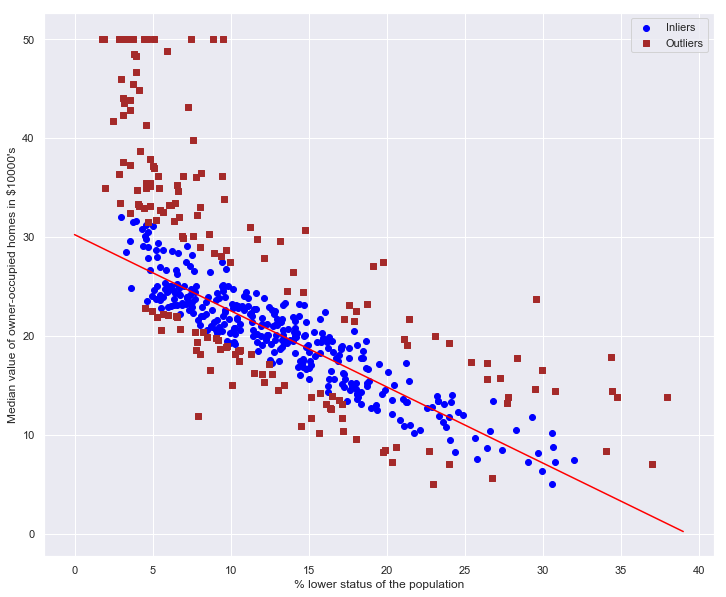

In [184]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(X1[inlier_mask1], y1[inlier_mask1], c='blue', marker='o', label='Inliers')
plt.scatter(X1[outlier_mask1], y1[outlier_mask1], c='brown', marker='s', label='Outliers')
plt.plot(line_X1, line_y_ransac1, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $10000\'s')
plt.legend(loc='upper right')
plt.show()

### Performance Evaluation of Regression Model

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
y_train_pred = lr.predict(X_train)

In [61]:
y_test_pred = lr.predict(X_test)

#### Residual Analysis

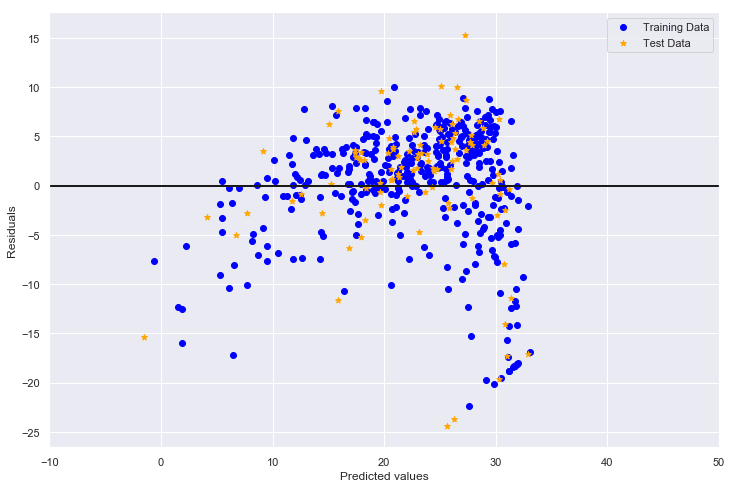

In [78]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test Data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k') #Plot horizontal lines at each *y* from *xmin* to *xmax*
plt.xlim([-10,50]) #Get or set the x limits of the current axes.
plt.show()

#### Mean Square error(MSE)

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
mean_squared_error(y_train, y_train_pred)

36.52396640695966

In [82]:
mean_squared_error(y_test, y_test_pred)

46.336305360025925

#### Coefficient of Determination

In [83]:
from sklearn.metrics import r2_score

In [84]:
r2_score(y_train, y_train_pred)

0.571031588576562

In [85]:
r2_score(y_test, y_test_pred)

0.43095672846187605

##### All the 14 features

In [97]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
#X = df.iloc[:,:-1].values

In [98]:
y = df['MEDV'].values

In [99]:
modellr = LinearRegression()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [102]:
modellr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
y_train_pred = modellr.predict(X_train)

In [104]:
y_test_pred = modellr.predict(X_test)

#### Residual Analysis (all features)

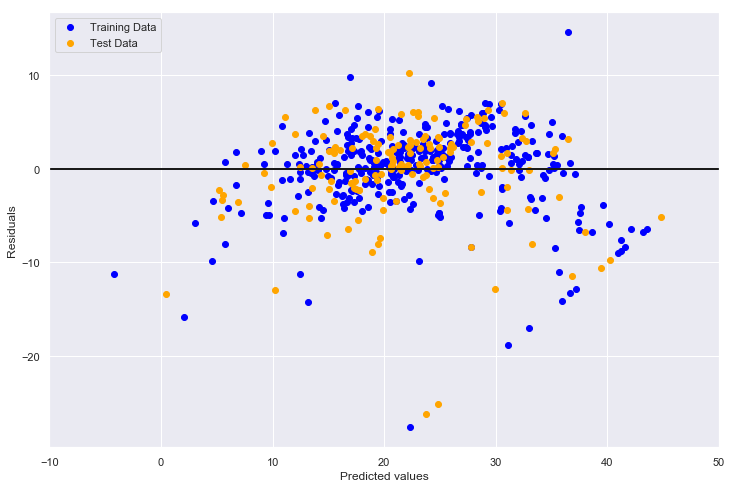

In [105]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='o', label='Test Data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

##### Mean Squared Error

In [106]:
mean_squared_error(y_train, y_train_pred)

19.958219814238046

In [108]:
mean_squared_error(y_test, y_test_pred)

27.195965766883354

##### Coefficient of Determination

In [109]:
r2_score(y_train, y_train_pred)

0.7645451026942549

In [110]:
r2_score(y_test, y_test_pred)

0.6733825506400177